https://www.kaggle.com/code/muneeb113/adv-sentiment-prediction-with-naive-bayes-on-imdb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
import os

In [ ]:
os.chdir('E:\Python code\IBM 文本分类数据')

file_name = 'IMDB Dataset.csv'
df = pd.read_csv(file_name)
df.head()

In [6]:
sentiment_mapping = {'negative': 0, 'positive': 4}
df['sentiment'] = df['sentiment'].map(sentiment_mapping)

In [7]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,4
1,A wonderful little production. <br /><br />The...,4
2,I thought this was a wonderful way to spend ti...,4
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",4


查看数据详情

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


4.1. 计数行和情感标签

In [9]:
num_rows = df.shape[0]
print("The number of rows in the dataframe is: ", num_rows)

The number of rows in the dataframe is:  50000


In [10]:
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Counts: ", sentiment_counts)

Sentiment Counts:  sentiment
4    25000
0    25000
Name: count, dtype: int64


4.2. Check basic Description

In [11]:
df.describe()

,sentiment
count,50000.00000
mean,2.00000
std,2.00002
min,0.00000
25%,0.00000
50%,2.00000
75%,4.00000
max,4.00000


4.3. Checking null values

In [12]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

4.4. Split dataset

In [13]:
# Assuming you want to split the data at the halfway point
# split_index = len(df) // 2

# We are taking first 5000 for model training and last 20 review for testing and predicting result
split_index_for_train = 5000
split_index_for_test = 49990
df_train = df.iloc[:split_index_for_train]
df_test = df.iloc[split_index_for_test:]
df_test = df_test.drop(columns=['sentiment'])
# Display the shapes of the resulting DataFrames
print("df_train shape:", df_train.shape)
print("df_test shape:", df_test.shape)

df_train shape: (5000, 2)
df_test shape: (10, 1)


4.5. Vectorization

In [14]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df_train['review'])
X_tfidf

<5000x39042 sparse matrix of type '<class 'numpy.float64'>'
	with 683418 stored elements in Compressed Sparse Row format>

# 5. Exploratory Data Analysis (EDA)¶

5.1. Sentiment Distribution:

Analyzing the Balance of Positive and Negative Sentiments

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


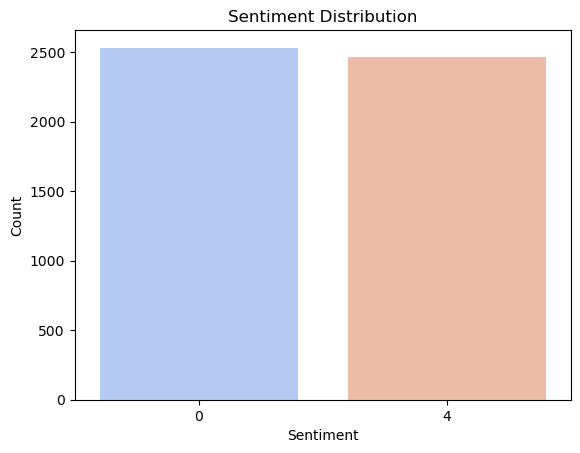

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df_train, palette='coolwarm')
plt.legend().remove()
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

5.2. Word Cloud Analysis

 
Visualizing the Most Frequent Words in Positive and Negative Reviews

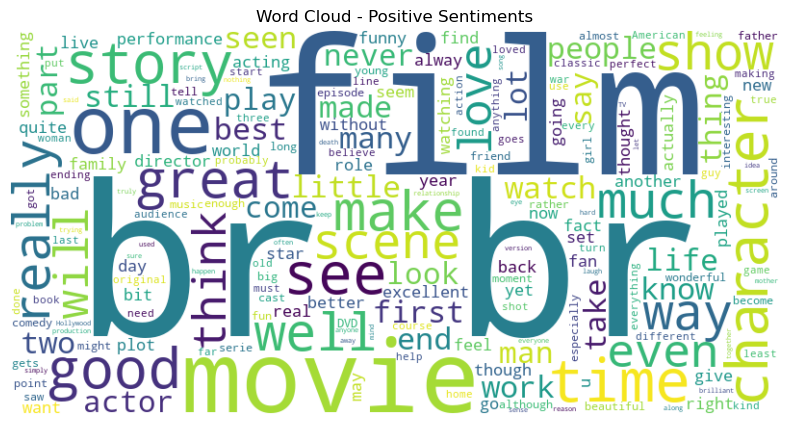

In [27]:
from wordcloud import WordCloud

# Generate word clouds for positive and negative sentiments
positive_text = ' '.join(df_train[df_train['sentiment'] == 4]['review'])
negative_text = ' '.join(df_train[df_train['sentiment'] == 0]['review'])

# Create and display word cloud for positive reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Sentiments')
plt.axis('off')
plt.show()

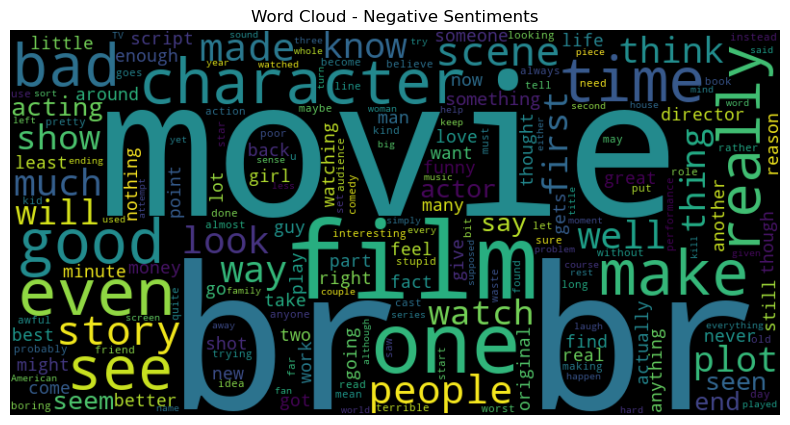

In [28]:
# Create and display word cloud for negative reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Sentiments')
plt.axis('off')
plt.show()

5.3. Bigram and Trigram Analysis

Identifying Common Word Pairs or Triplets in the Reviews

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
# Function to generate n-grams (bigrams or trigrams) without converting to dense
def get_top_n_grams(corpus, n=None, ngram_range=(2, 2)):
    vectorizer = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    ngrams = vectorizer.transform(corpus)
    # Sum the counts of each n-gram across all documents, without converting to dense
    ngram_counts = ngrams.sum(axis=0).A1
    # Get the n-grams as a list of tuples (feature name, count)
    ngram_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), ngram_counts)))
    # Convert counts to regular integers
    return [(ngram, int(count)) for ngram, count in ngram_counts.most_common(n)]

In [30]:
# Get the top 10 bigrams in the entire dataset
top_bigrams = get_top_n_grams(df_train['review'], n=10, ngram_range=(2, 2))
print('Top 10 Bigrams:', top_bigrams)

Top 10 Bigrams: [('br br', 10315), ('of the', 7686), ('in the', 5071), ('this movie', 3199), ('the film', 2690), ('and the', 2680), ('the movie', 2368), ('to the', 2358), ('to be', 2323), ('this film', 2164)]


In [31]:
# Get the top 10 trigrams in the entire dataset
top_trigrams = get_top_n_grams(df_train['review'], n=10, ngram_range=(3, 3))
print('Top 10 Trigrams:', top_trigrams)

Top 10 Trigrams: [('br br the', 1662), ('one of the', 951), ('this movie is', 505), ('of the film', 496), ('br br this', 471), ('of the movie', 401), ('some of the', 391), ('the film is', 365), ('br br it', 364), ('is one of', 355)]


5.4. Length Analysis

Examining the Relationship Between Review Length and Sentiment

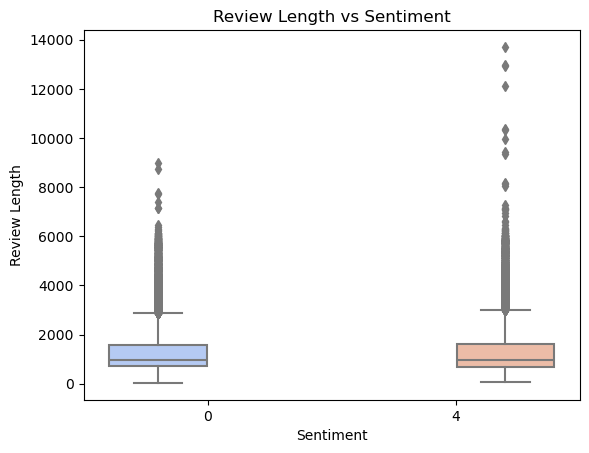

In [32]:
# Add a column for the length of each review
df['Text_Length'] = df['review'].apply(len)

# Create a boxplot without displaying the legend
sns.boxplot(x='sentiment', y='Text_Length', data=df, hue='sentiment', palette='coolwarm')
plt.legend().remove()
plt.title('Review Length vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

6. Model Training¶


6.1 Naive Bayes Classifier:

In [33]:
classifier = MultinomialNB()
classifier.fit(X_tfidf, df_train['sentiment'])

MultinomialNB()

In [34]:
new_statement_tfidf = vectorizer.transform(df_test['review'])
new_statement_tfidf

<10x39042 sparse matrix of type '<class 'numpy.float64'>'
	with 1253 stored elements in Compressed Sparse Row format>

In [35]:
new_statment_prediction = classifier.predict(new_statement_tfidf)
new_statment_prediction

array([0, 0, 4, 4, 0, 0, 0, 0, 0, 0], dtype=int64)

Displaying Predictions

In [36]:
for statement, prediction in zip(df_test['review'], new_statment_prediction):
    print(f"Statement: {statement}\nPredicted Sentiment: {'Positive' if prediction == 4 else 'Negative'}\n")

Statement: Lame, lame, lame!!! A 90-minute cringe-fest that's 89 minutes too long. A setting ripe with atmosphere and possibility (an abandoned convent) is squandered by a stinker of a script filled with clunky, witless dialogue that's straining oh-so-hard to be hip. Mostly it's just embarrassing, and the attempts at gonzo horror fall flat (a sample of this movie's dialogue: after demonstrating her artillery, fast dolly shot to a closeup of Barbeau's vigilante charactershe: `any questions?' hyuck hyuck hyuck). Bad acting, idiotic, homophobic jokes and judging from the creature effects, it looks like the director's watched `The Evil Dead' way too many times. <br /><br />I owe my friends big time for renting this turkey and subjecting them to ninety wasted minutes they'll never get back. What a turd.
Predicted Sentiment: Negative

Statement: Les Visiteurs, the first movie about the medieval time travelers was actually funny. I like Jean Reno as an actor, but there was more. There were u

6.2. Model Evaluation:

In [37]:
#generate confusion matrix
actual_labels = df_train['sentiment']
predicted_labels = classifier.predict(X_tfidf)

#compute confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)
print("Consfusion Matrix:")
print(cm)

#compute evolaution matrix
accuracy = accuracy_score(actual_labels, predicted_labels)
precision = precision_score(actual_labels, predicted_labels, pos_label=4)
recall = recall_score(actual_labels, predicted_labels, pos_label=4)
f1 = f1_score(actual_labels, predicted_labels, pos_label=4)

Consfusion Matrix:
[[2501   31]
 [ 308 2160]]


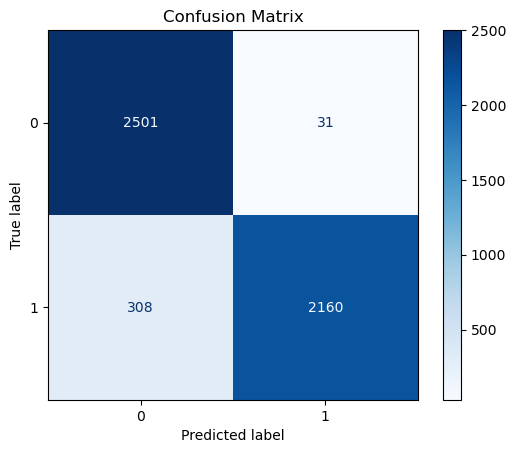

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()